# 01. Exploratory Data Analysis (EDA)
## Spaceship Titanic - Kaggle Competition

이 노트북에서는 Spaceship Titanic 데이터셋에 대한 탐색적 데이터 분석을 수행합니다.

## 1. 라이브러리 Import 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 로드
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (8693, 14)
Test shape: (4277, 13)


## 2. 데이터 기본 정보 확인

In [3]:
# Train 데이터 상위 5개 행
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# 데이터 타입 및 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# 기술 통계량
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
# 범주형 변수 기술 통계
train.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


## 3. 결측치 분석

In [7]:
# 결측치 현황
def check_missing(df, name='DataFrame'):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)
    print(f"\n{name} 결측치 현황:")
    print(missing_df)
    return missing_df

train_missing = check_missing(train, 'Train')
test_missing = check_missing(test, 'Test')


Train 결측치 현황:
              Missing Count  Missing %
CryoSleep               217   2.496261
ShoppingMall            208   2.392730
VIP                     203   2.335212
HomePlanet              201   2.312205
Name                    200   2.300702
Cabin                   199   2.289198
VRDeck                  188   2.162660
FoodCourt               183   2.105142
Spa                     183   2.105142
Destination             182   2.093639
RoomService             181   2.082135
Age                     179   2.059128

Test 결측치 현황:
              Missing Count  Missing %
FoodCourt               106   2.478373
Spa                     101   2.361468
Cabin                   100   2.338087
ShoppingMall             98   2.291326
Name                     94   2.197802
CryoSleep                93   2.174421
VIP                      93   2.174421
Destination              92   2.151040
Age                      91   2.127660
HomePlanet               87   2.034136
RoomService              82   1.917

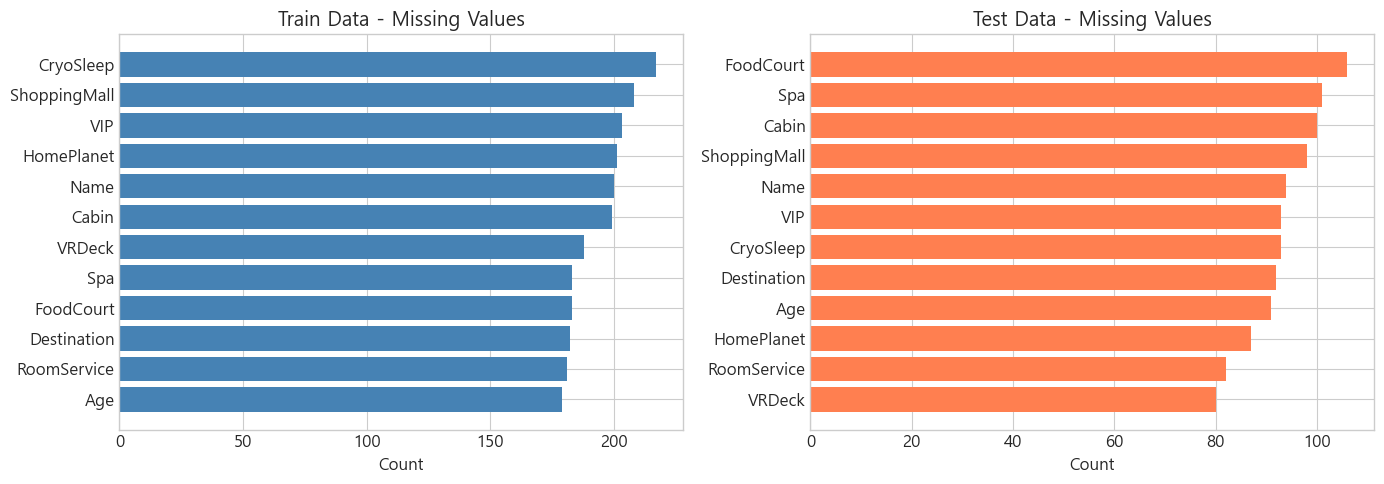

In [8]:
# 결측치 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train 결측치
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=True)
axes[0].barh(missing_train.index, missing_train.values, color='steelblue')
axes[0].set_title('Train Data - Missing Values')
axes[0].set_xlabel('Count')

# Test 결측치
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=True)
axes[1].barh(missing_test.index, missing_test.values, color='coral')
axes[1].set_title('Test Data - Missing Values')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

## 4. 타겟 변수 분석 (Transported)

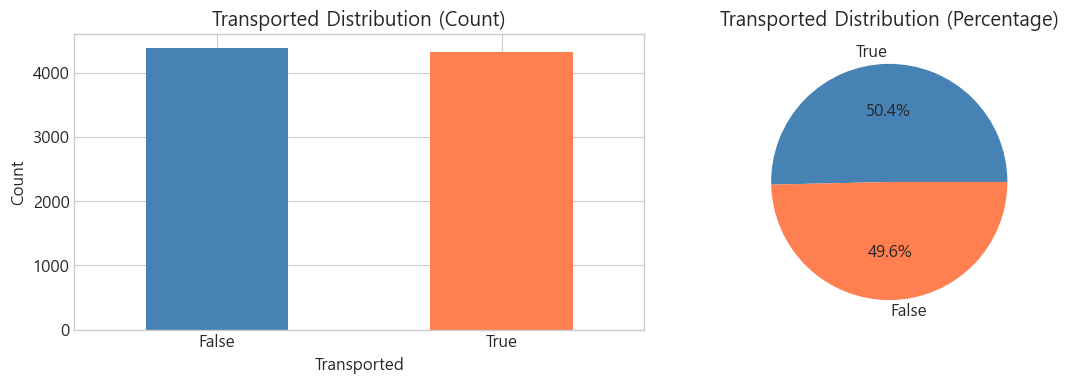


Transported 분포:
Transported
True     4378
False    4315
Name: count, dtype: int64

비율: 50.36%


In [9]:
# 타겟 변수 분포
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 카운트
train['Transported'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Transported Distribution (Count)')
axes[0].set_xlabel('Transported')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['False', 'True'], rotation=0)

# 비율
train['Transported'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['steelblue', 'coral'])
axes[1].set_title('Transported Distribution (Percentage)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\nTransported 분포:")
print(train['Transported'].value_counts())
print(f"\n비율: {train['Transported'].mean():.2%}")

## 5. 범주형 변수 분석

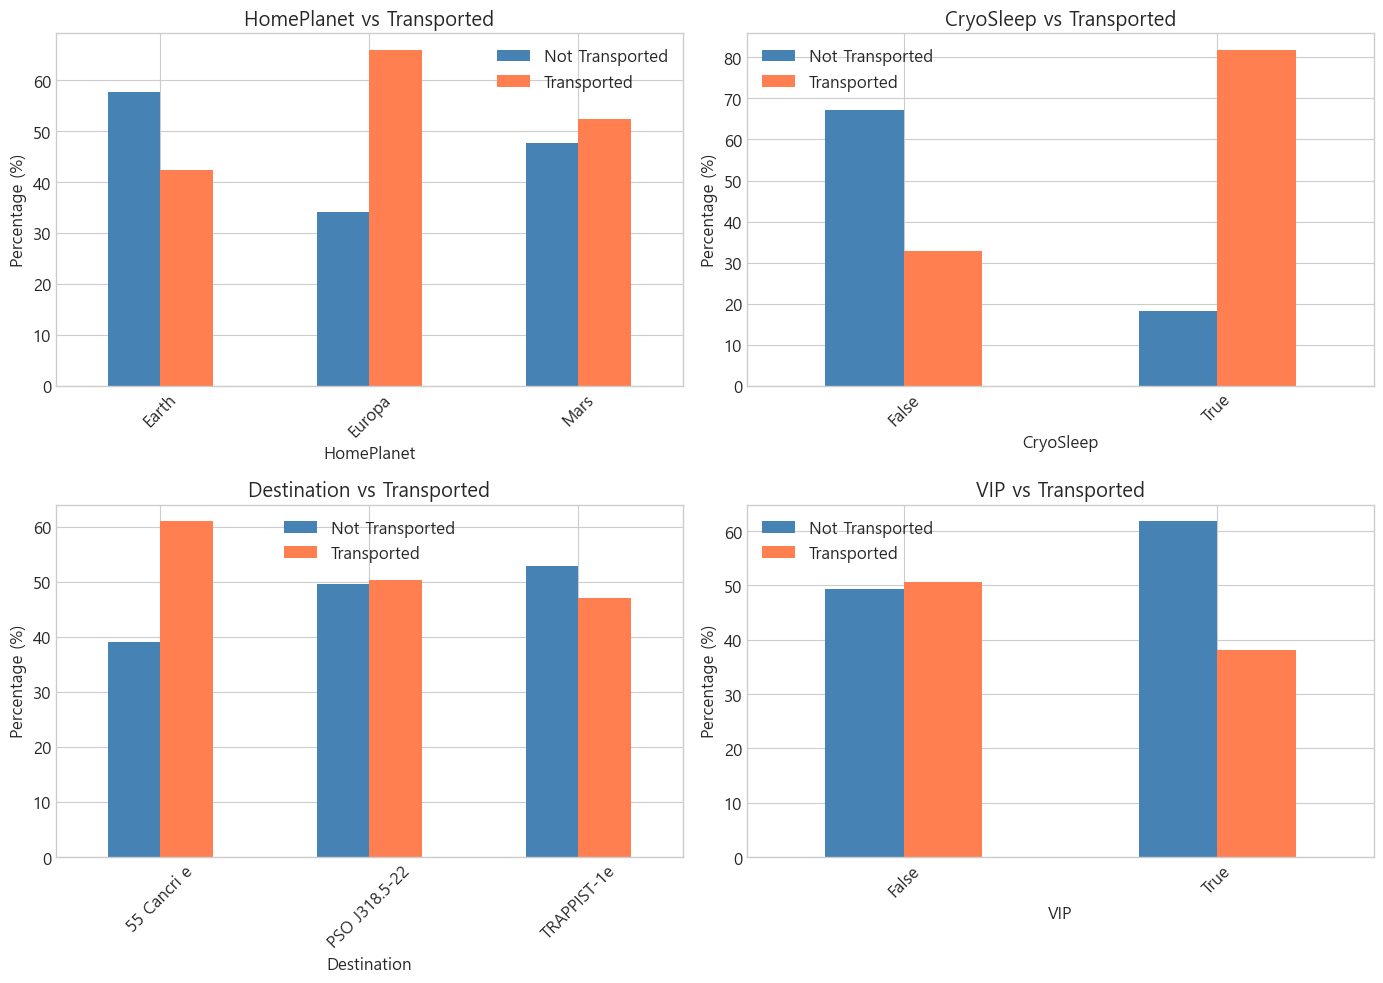

In [10]:
# 범주형 변수 목록
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    # 타겟별 분포
    ct = pd.crosstab(train[col], train['Transported'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[i], color=['steelblue', 'coral'])
    axes[i].set_title(f'{col} vs Transported')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].legend(['Not Transported', 'Transported'])
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

In [11]:
# 각 범주형 변수별 Transported 비율
for col in cat_cols:
    print(f"\n{col} vs Transported:")
    print(train.groupby(col)['Transported'].agg(['count', 'sum', 'mean']).rename(
        columns={'count': 'Total', 'sum': 'Transported', 'mean': 'Rate'}
    ))


HomePlanet vs Transported:
            Total  Transported      Rate
HomePlanet                              
Earth        4602         1951  0.423946
Europa       2131         1404  0.658846
Mars         1759          920  0.523024

CryoSleep vs Transported:
           Total  Transported      Rate
CryoSleep                              
False       5439         1789  0.328921
True        3037         2483  0.817583

Destination vs Transported:
               Total  Transported      Rate
Destination                                
55 Cancri e     1800         1098  0.610000
PSO J318.5-22    796          401  0.503769
TRAPPIST-1e     5915         2787  0.471175

VIP vs Transported:
       Total  Transported      Rate
VIP                                
False   8291         4198  0.506332
True     199           76  0.381910


## 6. 수치형 변수 분석

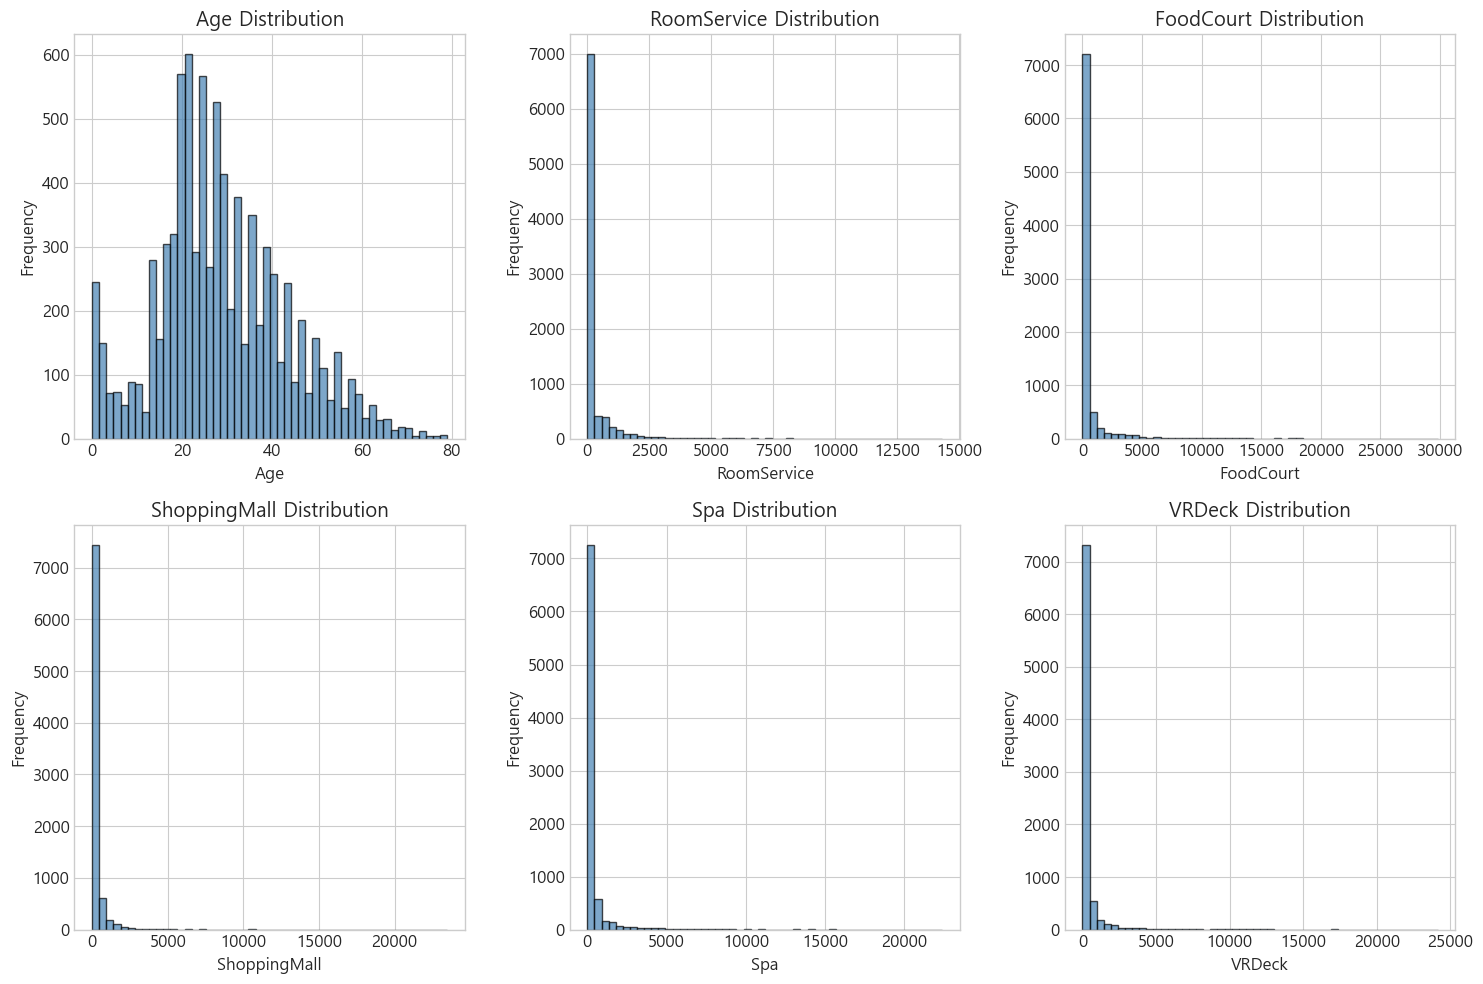

In [12]:
# 수치형 변수 목록
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# 분포 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(train[col].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

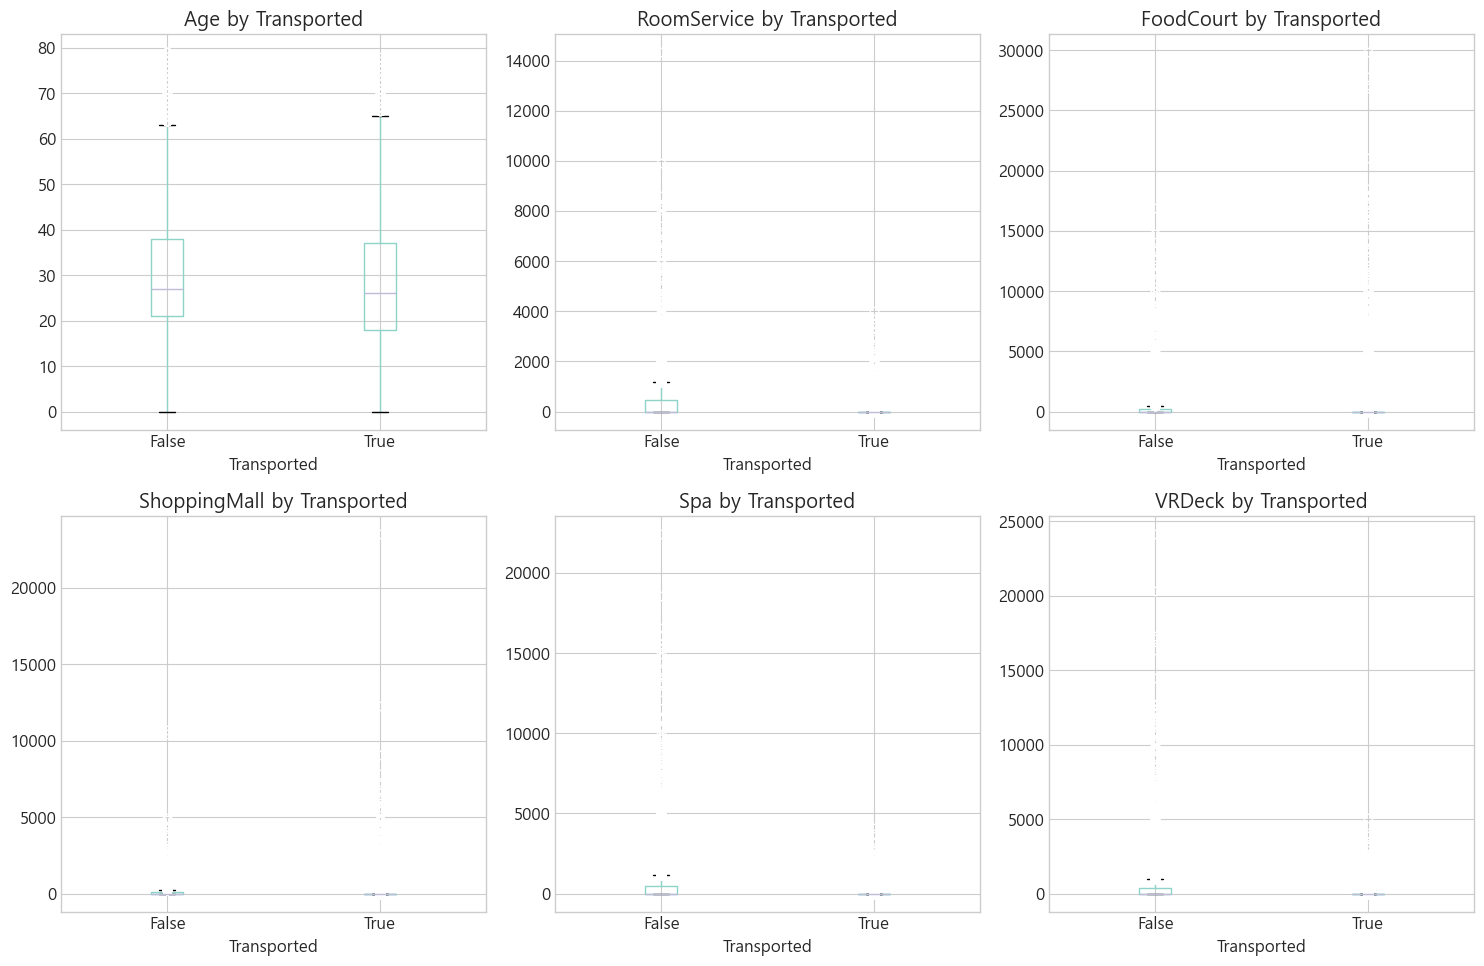

In [13]:
# Transported별 수치형 변수 분포 (Boxplot)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    train.boxplot(column=col, by='Transported', ax=axes[i])
    axes[i].set_title(f'{col} by Transported')
    axes[i].set_xlabel('Transported')
    
plt.suptitle('')
plt.tight_layout()
plt.show()

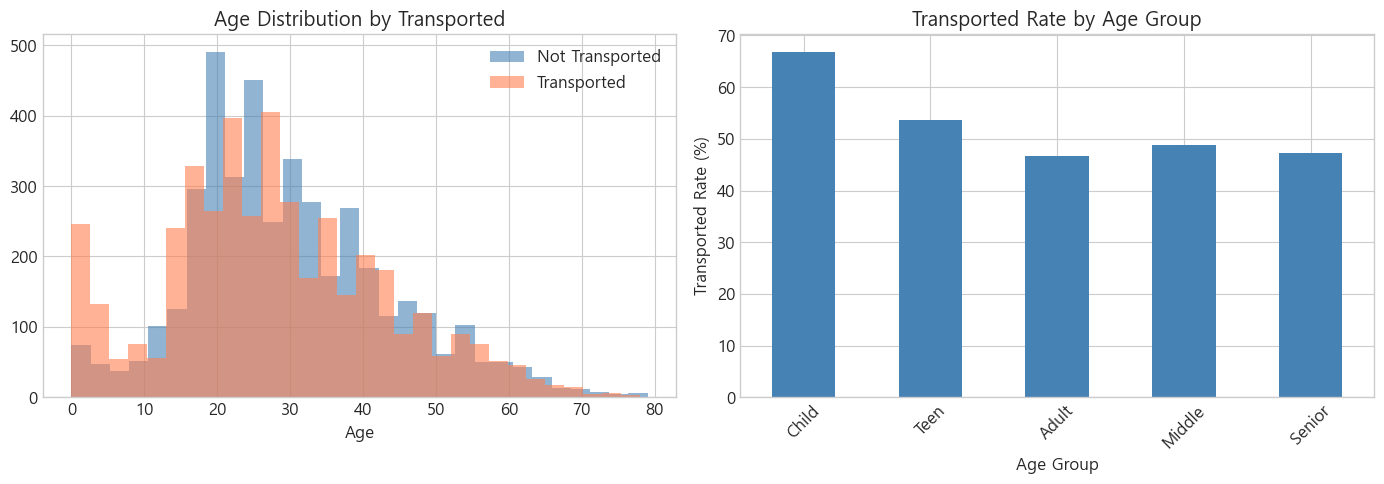

In [14]:
# Age 분포 상세 분석
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age 히스토그램 (Transported별)
train[train['Transported'] == False]['Age'].hist(bins=30, alpha=0.6, label='Not Transported', ax=axes[0], color='steelblue')
train[train['Transported'] == True]['Age'].hist(bins=30, alpha=0.6, label='Transported', ax=axes[0], color='coral')
axes[0].set_title('Age Distribution by Transported')
axes[0].set_xlabel('Age')
axes[0].legend()

# Age 그룹별 Transported 비율
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
age_transport = train.groupby('AgeGroup')['Transported'].mean() * 100
age_transport.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Transported Rate by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Transported Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# AgeGroup 삭제 (임시 컬럼)
train.drop('AgeGroup', axis=1, inplace=True)

## 7. 지출 변수 분석

In [15]:
# 총 지출액 계산
expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['TotalExpenditure'] = train[expense_cols].sum(axis=1)

# 지출 유무
train['HasExpenditure'] = (train['TotalExpenditure'] > 0).astype(int)

print("총 지출액 통계:")
print(train['TotalExpenditure'].describe())

총 지출액 통계:
count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: TotalExpenditure, dtype: float64


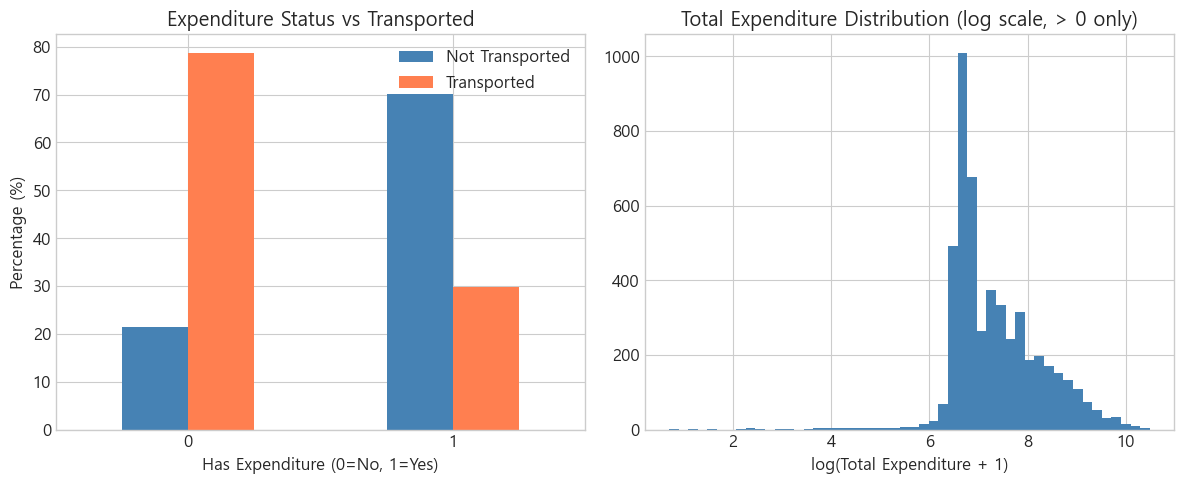


지출 유무별 Transported 비율:
HasExpenditure
0    0.786477
1    0.298611
Name: Transported, dtype: float64


In [16]:
# 지출 유무 vs Transported
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 지출 유무별 Transported 비율
ct = pd.crosstab(train['HasExpenditure'], train['Transported'], normalize='index') * 100
ct.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Expenditure Status vs Transported')
axes[0].set_xlabel('Has Expenditure (0=No, 1=Yes)')
axes[0].set_ylabel('Percentage (%)')
axes[0].legend(['Not Transported', 'Transported'])
axes[0].tick_params(axis='x', rotation=0)

# 총 지출액 분포 (log scale)
train[train['TotalExpenditure'] > 0]['TotalExpenditure'].apply(np.log1p).hist(bins=50, ax=axes[1], color='steelblue')
axes[1].set_title('Total Expenditure Distribution (log scale, > 0 only)')
axes[1].set_xlabel('log(Total Expenditure + 1)')

plt.tight_layout()
plt.show()

print(f"\n지출 유무별 Transported 비율:")
print(train.groupby('HasExpenditure')['Transported'].mean())

In [17]:
# 임시 컬럼 삭제
train.drop(['TotalExpenditure', 'HasExpenditure'], axis=1, inplace=True)

## 8. Cabin 분석

In [18]:
# Cabin 분해
train_cabin = train['Cabin'].str.split('/', expand=True)
train_cabin.columns = ['Deck', 'CabinNum', 'Side']

print("Deck 분포:")
print(train_cabin['Deck'].value_counts())
print("\nSide 분포:")
print(train_cabin['Side'].value_counts())

Deck 분포:
Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

Side 분포:
Side
S    4288
P    4206
Name: count, dtype: int64


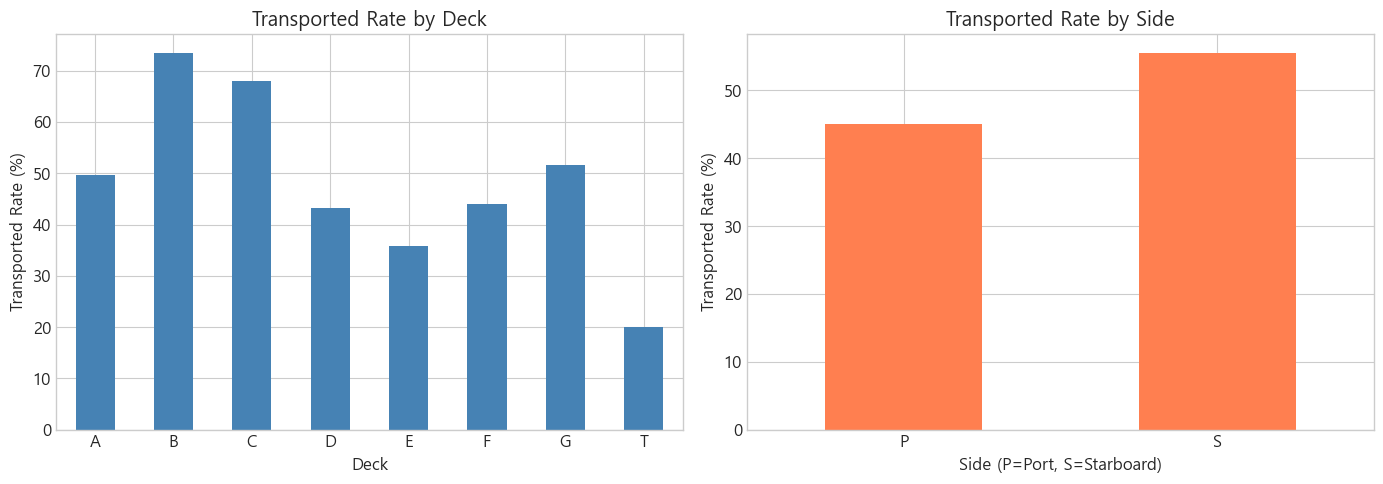

In [19]:
# Deck, Side vs Transported
train['Deck'] = train_cabin['Deck']
train['Side'] = train_cabin['Side']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Deck vs Transported
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
deck_transport = train.groupby('Deck')['Transported'].mean().reindex(deck_order) * 100
deck_transport.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Transported Rate by Deck')
axes[0].set_xlabel('Deck')
axes[0].set_ylabel('Transported Rate (%)')
axes[0].tick_params(axis='x', rotation=0)

# Side vs Transported
side_transport = train.groupby('Side')['Transported'].mean() * 100
side_transport.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Transported Rate by Side')
axes[1].set_xlabel('Side (P=Port, S=Starboard)')
axes[1].set_ylabel('Transported Rate (%)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 임시 컬럼 삭제
train.drop(['Deck', 'Side'], axis=1, inplace=True)

## 9. 그룹 분석 (PassengerId)

In [20]:
# 그룹 추출
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0])
train['GroupSize'] = train.groupby('Group')['Group'].transform('count')

print("그룹 크기 분포:")
print(train['GroupSize'].value_counts().sort_index())

그룹 크기 분포:
GroupSize
1    4805
2    1682
3    1020
4     412
5     265
6     174
7     231
8     104
Name: count, dtype: int64


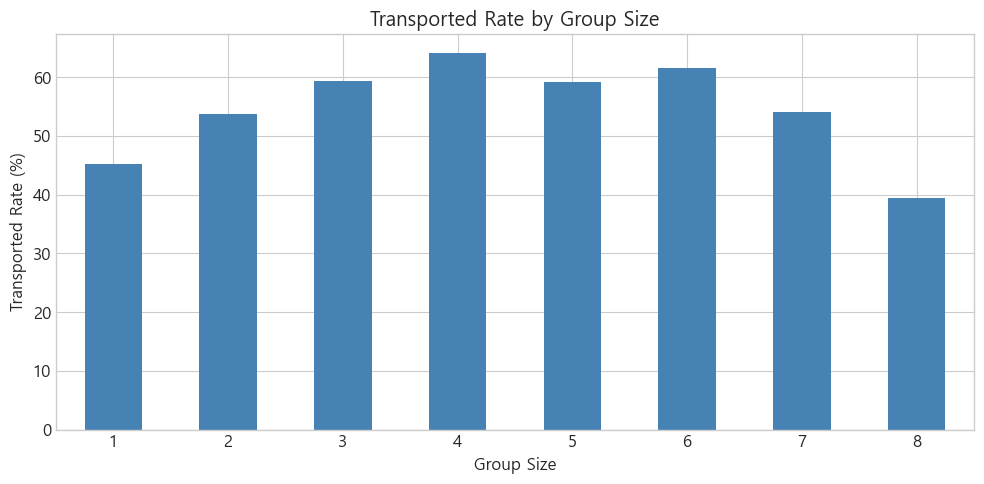

In [21]:
# 그룹 크기 vs Transported
fig, ax = plt.subplots(figsize=(10, 5))

group_transport = train.groupby('GroupSize')['Transported'].mean() * 100
group_transport.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Transported Rate by Group Size')
ax.set_xlabel('Group Size')
ax.set_ylabel('Transported Rate (%)')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 임시 컬럼 삭제
train.drop(['Group', 'GroupSize'], axis=1, inplace=True)

## 10. CryoSleep과 지출 관계

In [22]:
# CryoSleep 승객의 지출 현황
expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print("CryoSleep=True인 승객의 지출 합계:")
cryo_expense = train[train['CryoSleep'] == True][expense_cols].sum()
print(cryo_expense)

print(f"\nCryoSleep=True인 승객 중 지출이 있는 경우: {(train[train['CryoSleep'] == True][expense_cols].sum(axis=1) > 0).sum()}명")

CryoSleep=True인 승객의 지출 합계:
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

CryoSleep=True인 승객 중 지출이 있는 경우: 0명


## 11. 상관관계 분석

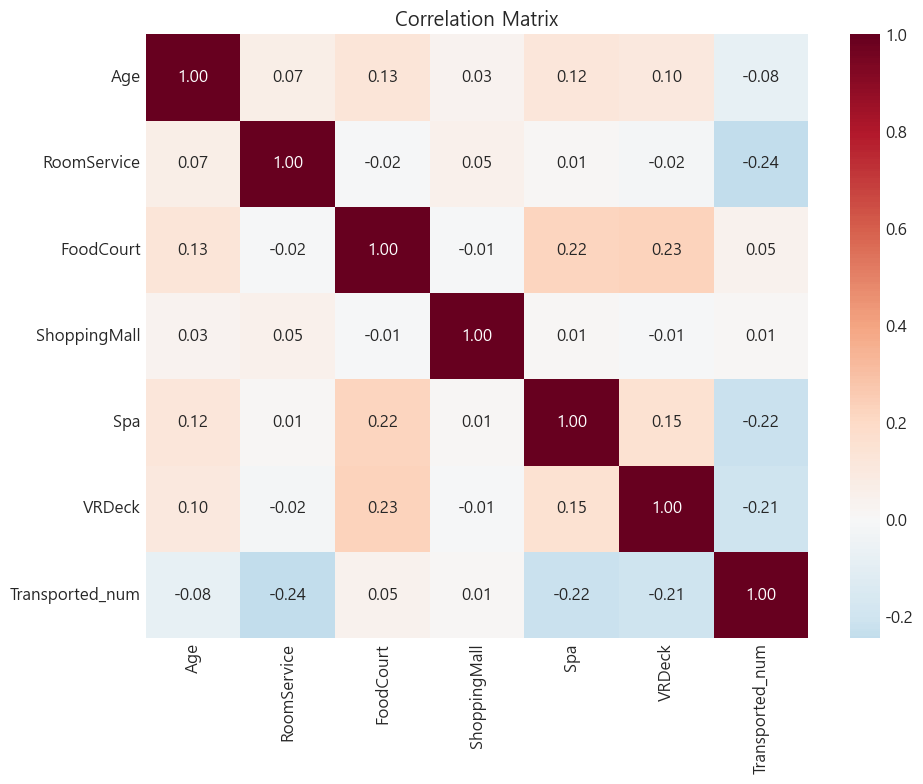

In [23]:
# 수치형 변수 상관관계
num_cols_corr = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_temp = train.copy()
train_temp['Transported_num'] = train_temp['Transported'].astype(int)

corr_matrix = train_temp[num_cols_corr + ['Transported_num']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 12. 주요 인사이트 정리

### 타겟 변수
- Transported 비율은 약 50:50으로 균형 잡힌 분포

### 범주형 변수
- **CryoSleep**: 동면 상태인 승객의 Transported 비율이 높음
- **HomePlanet**: Europa 출신 승객의 Transported 비율이 상대적으로 높음
- **VIP**: VIP 여부는 Transported와 큰 관계가 없어 보임

### 수치형 변수
- **지출 변수**: 지출이 없는 승객의 Transported 비율이 높음
- **Age**: 어린 승객(Child)과 청소년(Teen)의 Transported 비율이 상대적으로 높음

### Cabin
- **Deck**: B, C 데크의 Transported 비율이 상대적으로 높음
- **Side**: S(우현)의 Transported 비율이 약간 높음

### 결측치
- 대부분의 변수에 약 2% 정도의 결측치 존재
- CryoSleep과 지출 변수 간의 관계를 활용한 결측치 처리 가능

In [24]:
print("EDA 완료!")
print("다음 단계: 02_Preprocessing.ipynb에서 전처리 및 Feature Engineering 수행")

EDA 완료!
다음 단계: 02_Preprocessing.ipynb에서 전처리 및 Feature Engineering 수행
